In [41]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import json
import seaborn as sns
import matplotlib as plt

In [7]:
#Read the CSV 

with open("./user_data_2") as f:
    data = []
    
    for line in f:
        line_dict = json.loads(line)
        data.append(line_dict)
    df = pd.DataFrame.from_records(data)

In [14]:
#Missing counts. 
df.isnull().sum(axis=0)

_host                     58
ad_network_id          16379
ad_type                16379
adlog_count            77954
advertiser_id          16379
app_id                 82027
app_name               82027
app_ver                82183
bd                     82063
bid_requests           77954
bid_responses          77954
bundle_id              82027
c_cnt                  34135
c_flag_cnt             34135
c_timestamp           120141
c_txn_fee             120212
c_txn_rate            120212
campaign_id            16379
campaign_type          16379
ck                        58
cr                     82063
cr_cnt                 16379
creative_id            16379
dnt                    82027
exp_mode               16578
f_cnt                  34135
f_nff                  97301
f_nfr                  81157
f_nfr_flag_cnt        120218
f_nfto                119787
                       ...  
txn_rate               87480
ua                        58
ua_device                 58
ua_device_type

In [16]:
#Drop rows where click count is Na. 
df = df.dropna(subset=['c_cnt'])
print(df.shape)

(86087, 104)


In [20]:
#Rows where click count is true. 
clicked = df[df['c_cnt']==1]
clicked

,_host,ad_network_id,ad_type,adlog_count,advertiser_id,app_id,app_name,app_ver,bd,bid_requests,...,vv_timestamp_vv75,vv_timestamp_vvi,vv_v_cnt,vv_vv100_cnt,vv_vv25_cnt,vv_vv50_cnt,vv_vv75_cnt,vv_vvi_cnt,widget_id,zone_id
1486,an-prod-ralphie-frontline-jerid.us-east-1,603.0,[story],1.0,1765.0,NaN,NaN,NaN,NaN,"[9968, 2547, 1013, 21493, 21494, 18887, 5479, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,technology-mb,38965.0
4238,an-prod-ralphie-frontline-tulle.eu-west-1,734.0,[story],1.0,3167.0,viber,,8.3.0.6,,"[19914, 20578, 20579, 2547, 24275, 24276, 1802...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,23580.0
4487,an-prod-ralphie-frontline-bulks.us-east-1,826.0,[story],1.0,2706.0,NaN,NaN,NaN,NaN,"[26178, 21494]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mfpblog,4866.0
6279,an-prod-ralphie-frontline-fleys.us-east-1,1839.0,[story],NaN,4523.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,44721.0
9134,an-prod-ralphie-frontline-orlon.us-east-1,1804.0,[app_install],NaN,4436.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,44721.0
9867,an-prod-ralphie-frontline-bulks.us-east-1,1828.0,[story],NaN,4539.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,44721.0
13073,an-prod-ralphie-frontline-tulle.eu-west-1,734.0,[story],NaN,2460.0,viber,,6.8.5.15,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,27168.0
14700,an-prod-ralphie-frontline-fleck.eu-west-1,1173.0,[story],NaN,3224.0,viber,,1,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,15023.0
14797,an-prod-ralphie-frontline-soths.us-east-1,734.0,[story],NaN,3943.0,viber,,8.5.0,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,27168.0
16091,an-prod-ralphie-frontline-laris.us-east-1,1452.0,[story],NaN,3766.0,viber,,8.5.0,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,27168.0


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


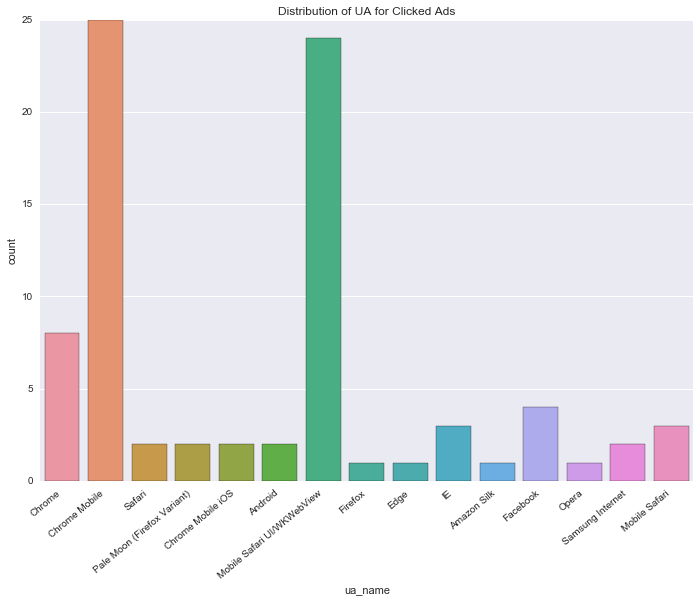

In [44]:
#sns.barplot(clicked['ua_name'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.countplot(x="ua_name", data=clicked, label='small')
fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
fig.set_title("Distribution of UA for Clicked Ads")

In [76]:
#A lot of the rows in the ck field don't have gender. Need to look into this by cross checking 
#with other files. 
import ast

for ck in clicked['ck']: 
    dictionary = ast.literal_eval(ck)
    if ('gender' in dictionary): 
        print(dictionary['gender'])


['unknown']
['unknown']
['f']
['unknown']
['unknown']
['f']
['unknown']
['m']
['f']
['m']
['m']
['unknown']
['unknown']
['unknown']


SyntaxError: unexpected EOF while parsing (<unknown>, line 0)

In [75]:
df['url'].str.replace(punct_re, '')

1486      https://technology.mb.com.ph/2018/03/31/apple-...
4238                                                   None
4487      http://blog.myfitnesspal.com/the-most-dangerou...
6279      http://www.imanila.net/?utm_source=tri&utm_med...
9134      http://www.skylabs.info/?utm_source=globalsear...
9867      http://www.imanila.net/?utm_source=globalsearc...
13073                                                  None
14700                                                  None
14797                                                  None
16091                                                  None
17775     https://www.newsmax.com/newsfront/vt-gun-restr...
18241                                                  None
20161                                                  None
20909                                                  None
21238                                                  None
21265     http://thehill.com/blogs/in-the-know/in-the-kn...
22553                                   